# Assignment-01

## 1. Implementation of the Apri-ori and the rule extractor al-gorithms (8 Pts.)


In [48]:
# your code here 

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
def plot_rules_scatter(df_rules: pd.DataFrame, title: str):
    if df_rules.empty:
        return
    plt.figure()
    plt.scatter(df_rules["confidence"], df_rules["support"], s=df_rules["lift"]*30, alpha=0.6)
    plt.xlabel("Confidence")
    plt.ylabel("Support")
    plt.title(title)
    plt.grid(True, linestyle=":")
    plt.show()

## 2. Mining frequent itemsets and association rules in a movie rating dataset (22Pts.)

### 2.1 Building the transactionaldatabases (8 pts.)

In [50]:
def create_transaction():
    with open('MovieLensDatasets/ratings.dat', 'r') as file:
        data = file.readlines()
        positive_transactions = {}
        negative_transactions = {}
        for row in data:
            user_id, movie_id, rating, _ = map(int, row.strip().split('::'))
            if user_id not in positive_transactions:
                positive_transactions[user_id] = []
            if user_id not in negative_transactions:
                negative_transactions[user_id] = []
            if rating >= 4:
                positive_transactions[user_id].append(movie_id)
            elif rating <= 2:
                negative_transactions[user_id].append(movie_id)
    return positive_transactions, negative_transactions

positive_transactions, negative_transactions = create_transaction()

### 2.2 Getting first results (6 pts.)

In [51]:
def create_movie_name_dict():
    with open('MovieLensDatasets/movies.dat', 'r', encoding='latin-1') as file:
        movie_names = {}
        for row in file:
            parts = row.rstrip('\n').split('::', 2)
            movie_id = int(parts[0])
            name = parts[1]
            movie_names[movie_id] = name
    return movie_names

movie_name_dict = create_movie_name_dict()
print(movie_name_dict[positive_transactions[1][1]])


Erin Brockovich (2000)


In [52]:

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

positive_datasets = [items for items in positive_transactions.values() if len(items) > 0]
te = TransactionEncoder()
te_ary = te.fit(positive_datasets).transform(positive_datasets)
df = pd.DataFrame(te_ary, columns=te.columns_)
# Generate frequent itemsets

min_support = 0.5
step = 0.1
min_floor = 0.01

while min_support >= min_floor:
    positive_frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    max_size = positive_frequent_itemsets['itemsets'].apply(lambda x: len(x)).max() if not positive_frequent_itemsets.empty else 0
    print(f"min_support={min_support:.3f} -> max_itemset_size={max_size}, count={len(positive_frequent_itemsets)}")
    if max_size >= 3:
        print(f"Stopping: reached itemsets of size >= 3 at min_support={min_support:.3f}")
        break
    min_support = round(min_support - step, 3)
else:
    print(f"No 3-itemsets found down to min_support={min_floor}")





min_support=0.500 -> max_itemset_size=0, count=0
min_support=0.400 -> max_itemset_size=1, count=3
min_support=0.300 -> max_itemset_size=2, count=20
min_support=0.200 -> max_itemset_size=3, count=108
Stopping: reached itemsets of size >= 3 at min_support=0.200
min_support=0.200 -> max_itemset_size=3, count=108
Stopping: reached itemsets of size >= 3 at min_support=0.200



Association Rules Count: 57

Sample Association Rules:
                                           antecedents  \
52  (Star Wars: Episode V - The Empire Strikes Bac...   
53  (Star Wars: Episode VI - Return of the Jedi (1...   
54  (Matrix, The (1999), Star Wars: Episode V - Th...   
55  (Matrix, The (1999), Star Wars: Episode IV - A...   
56  (Star Wars: Episode V - The Empire Strikes Bac...   

                                          consequents  antecedent support  \
52  (Star Wars: Episode VI - Return of the Jedi (1...            0.324611   
53  (Star Wars: Episode V - The Empire Strikes Bac...            0.352269   
54        (Star Wars: Episode IV - A New Hope (1977))            0.242133   
55  (Star Wars: Episode V - The Empire Strikes Bac...            0.245114   
56                               (Matrix, The (1999))            0.324611   

    consequent support   support  confidence      lift  representativity  \
52            0.352269  0.235508    0.725510  2.059535       

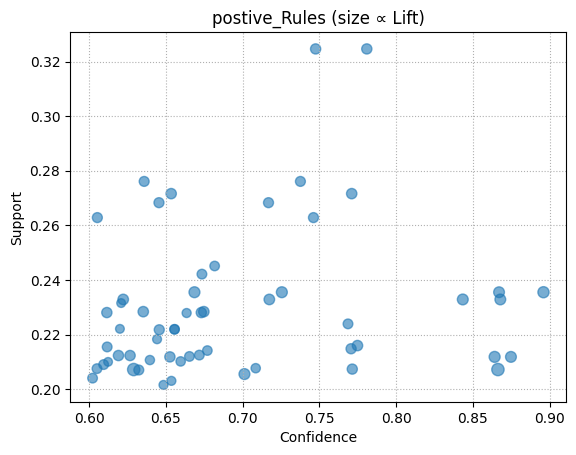

In [53]:
positive_rules = association_rules(positive_frequent_itemsets, metric="confidence", min_threshold=0.6)
positive_rules['antecedents'] = positive_rules['antecedents'].apply(lambda x: frozenset([movie_name_dict[item] for item in x]))
positive_rules['consequents'] = positive_rules['consequents'].apply(lambda x: frozenset([movie_name_dict[item] for item in x]))
print("\nAssociation Rules Count:", len(positive_rules))
print("\nSample Association Rules:\n", positive_rules[-5:])
plot_rules_scatter(positive_rules, "postive_Rules (size ∝ Lift)")

In [54]:
negative_datasets = [items for items in negative_transactions.values() if len(items) > 0]
te = TransactionEncoder()
te_ary = te.fit(negative_datasets).transform(negative_datasets)
df = pd.DataFrame(te_ary, columns=te.columns_)
# Generate frequent itemsets

min_support =0.1
step = 0.01
min_floor = 0.001

while min_support >= min_floor:
    negative_frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    max_size = negative_frequent_itemsets['itemsets'].apply(lambda x: len(x)).max() if not negative_frequent_itemsets.empty else 0
    print(f"min_support={min_support:.3f} -> max_itemset_size={max_size}, count={len(negative_frequent_itemsets)}")
    if max_size >= 3:
        print(f"Stopping: reached itemsets of size >= 3 at min_support={min_support:.3f}")
        break
    min_support = round(min_support - step, 3)
else:
    print(f"No 3-itemsets found down to min_support={min_floor}")




min_support=0.100 -> max_itemset_size=0, count=0
min_support=0.090 -> max_itemset_size=1, count=1
min_support=0.080 -> max_itemset_size=1, count=2
min_support=0.070 -> max_itemset_size=1, count=3
min_support=0.060 -> max_itemset_size=1, count=9
min_support=0.050 -> max_itemset_size=1, count=26
min_support=0.070 -> max_itemset_size=1, count=3
min_support=0.060 -> max_itemset_size=1, count=9
min_support=0.050 -> max_itemset_size=1, count=26
min_support=0.040 -> max_itemset_size=1, count=58
min_support=0.040 -> max_itemset_size=1, count=58
min_support=0.030 -> max_itemset_size=2, count=150
min_support=0.030 -> max_itemset_size=2, count=150
min_support=0.020 -> max_itemset_size=2, count=397
min_support=0.020 -> max_itemset_size=2, count=397
min_support=0.010 -> max_itemset_size=3, count=2221
Stopping: reached itemsets of size >= 3 at min_support=0.010
min_support=0.010 -> max_itemset_size=3, count=2221
Stopping: reached itemsets of size >= 3 at min_support=0.010



Association Rules Count:
 40

Sample Association Rules (last 5):

                                                                                  antecedents                                        consequents  antecedent support  consequent support  support  confidence      lift  representativity  leverage  conviction  zhangs_metric  jaccard  certainty  kulczynski
     (Police Academy 6: City Under Siege (1989), Police Academy 4: Citizens on Patrol (1987)) (Police Academy 5: Assignment: Miami Beach (1988))            0.012980            0.019730 0.011250    0.866667 43.926316               1.0  0.010993    7.352025       0.990086 0.524194   0.863983    0.718421
(Police Academy 5: Assignment: Miami Beach (1988), Police Academy 6: City Under Siege (1989))      (Police Academy 4: Citizens on Patrol (1987))            0.014711            0.021288 0.011250    0.764706 35.922525               1.0  0.010936    4.159528       0.986677 0.454545   0.759588    0.646581
                        

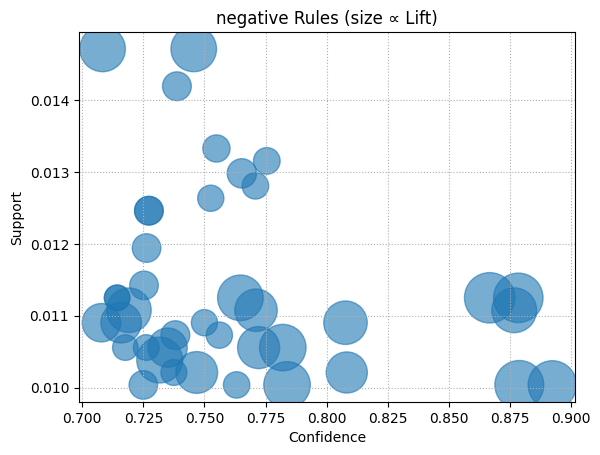

In [55]:
negative_rules = association_rules(negative_frequent_itemsets, metric="confidence", min_threshold=0.7)
negative_rules['antecedents'] = negative_rules['antecedents'].apply(lambda x: frozenset([movie_name_dict[item] for item in x]))
negative_rules['consequents'] = negative_rules['consequents'].apply(lambda x: frozenset([movie_name_dict[item] for item in x]))
print("\nAssociation Rules Count:\n", len(negative_rules))
print("\nSample Association Rules (last 5):\n")
print(negative_rules.tail(5).to_string(index=False))
plot_rules_scatter(negative_rules, "negative Rules (size ∝ Lift)")

### 2.3 A deeper look (8 Pts.)

In [56]:
# Load user demographic data
def load_user_demographics():
    """Load user demographics from users.dat"""
    users = {}
    with open('MovieLensDatasets/users.dat', 'r', encoding='latin-1') as file:
        for line in file:
            parts = line.strip().split('::')
            user_id = int(parts[0])
            gender = parts[1]  # 'M' or 'F'
            age = int(parts[2])
            occupation = int(parts[3])
            users[user_id] = {
                'gender': gender,
                'age': age,
                'occupation': occupation
            }
    return users

user_demographics = load_user_demographics()

# to create demographic-specific transaction databases
def create_demographic_transactions(demographics, transactions, filter_func):
    """Filter transactions based on demographic criteria"""
    filtered_trans = {}
    for user_id, items in transactions.items():
        if user_id in demographics and filter_func(demographics[user_id]):
            filtered_trans[user_id] = items
    return filtered_trans

In [57]:
# 1. Gender-based analysis
male_pos_trans = create_demographic_transactions(
    user_demographics, positive_transactions, 
    lambda u: u['gender'] == 'M'
)
female_pos_trans = create_demographic_transactions(
    user_demographics, positive_transactions, 
    lambda u: u['gender'] == 'F'
)

# 2. Occupation-based analysis (students = occupation code 4)
student_pos_trans = create_demographic_transactions(
    user_demographics, positive_transactions, 
    lambda u: u['occupation'] == 4
)
non_student_pos_trans = create_demographic_transactions(
    user_demographics, positive_transactions, 
    lambda u: u['occupation'] != 4
)

print(f"Male users: {len(male_pos_trans)}")
print(f"Female users: {len(female_pos_trans)}")
print(f"Student users: {len(student_pos_trans)}")
print(f"Non-student users: {len(non_student_pos_trans)}")

Male users: 4331
Female users: 1709
Student users: 759
Non-student users: 5281


In [58]:
# to mine rules for a demographic segment
def mine_demographic_rules(transactions_dict, segment_name, min_sup=0.05, min_conf=0.6):
    """Mine association rules for a specific demographic segment"""
    datasets = [items for items in transactions_dict.values() if len(items) > 0]
    
    if len(datasets) < 10:
        print(f"\n{segment_name}: Not enough transactions")
        return None, None
    
    te = TransactionEncoder()
    te_ary = te.fit(datasets).transform(datasets)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    
    # Find frequent itemsets
    frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
    
    if frequent_itemsets.empty:
        print(f"\n{segment_name}: No frequent itemsets found")
        return None, None
    
    # Generate rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)
    
    if rules.empty:
        print(f"\n{segment_name}: No rules found")
        return frequent_itemsets, None
    
    # Convert movie IDs to names
    rules['antecedents'] = rules['antecedents'].apply(
        lambda x: frozenset([movie_name_dict[item] for item in x])
    )
    rules['consequents'] = rules['consequents'].apply(
        lambda x: frozenset([movie_name_dict[item] for item in x])
    )
    
    return frequent_itemsets, rules

GENDER-BASED ANALYSIS

Male Users - Top 5 Rules by Lift:
                                                                            antecedents                                                                                        consequents  support  confidence     lift
            (Godfather: Part II, The (1974), Star Wars: Episode IV - A New Hope (1977))                     (Star Wars: Episode V - The Empire Strikes Back (1980), Godfather, The (1972)) 0.151305    0.794903 3.393624
         (Star Wars: Episode V - The Empire Strikes Back (1980), Godfather, The (1972))                        (Godfather: Part II, The (1974), Star Wars: Episode IV - A New Hope (1977)) 0.151305    0.645957 3.393624
                     (Godfather, The (1972), Star Wars: Episode IV - A New Hope (1977))            (Star Wars: Episode V - The Empire Strikes Back (1980), Godfather: Part II, The (1974)) 0.151305    0.611007 3.269532
(Star Wars: Episode V - The Empire Strikes Back (1980), Godfather: Part II,

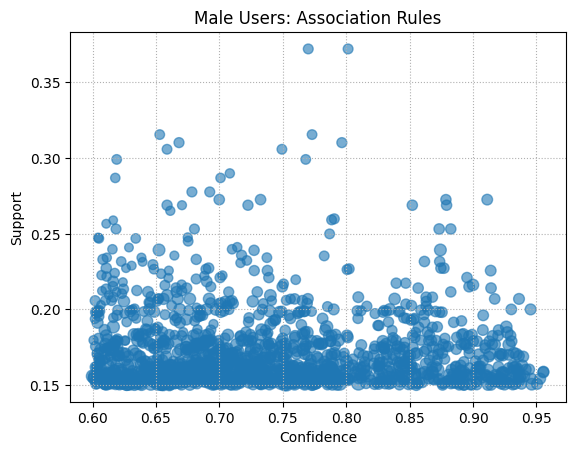


Female Users - Top 5 Rules by Lift:
                                            antecedents                                             consequents  support  confidence     lift
                                  (Pulp Fiction (1994))                                          (Fargo (1996)) 0.172616    0.739348 2.344242
    (Star Wars: Episode VI - Return of the Jedi (1983)) (Star Wars: Episode V - The Empire Strikes Back (1980)) 0.173786    0.673469 2.301918
(Star Wars: Episode V - The Empire Strikes Back (1980))             (Star Wars: Episode IV - A New Hope (1977)) 0.204213    0.698000 2.250721
            (Star Wars: Episode IV - A New Hope (1977)) (Star Wars: Episode V - The Empire Strikes Back (1980)) 0.204213    0.658491 2.250721
    (Star Wars: Episode VI - Return of the Jedi (1983))             (Star Wars: Episode IV - A New Hope (1977)) 0.170860    0.662132 2.135062


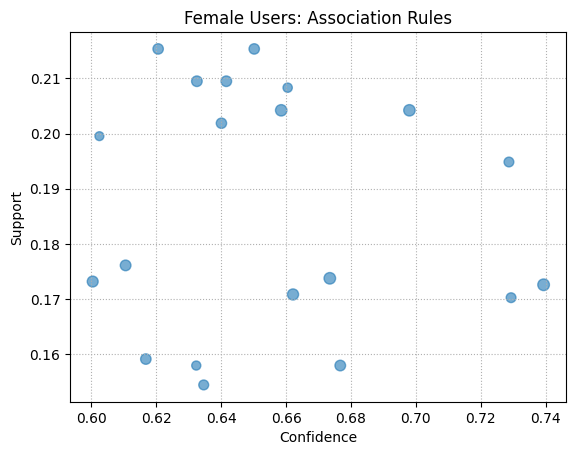

In [59]:
# Mine rules for Gender-based segments
print("="*80)
print("GENDER-BASED ANALYSIS")
print("="*80)

male_freq, male_rules = mine_demographic_rules(male_pos_trans, "Male Users", min_sup=0.15, min_conf=0.6)
female_freq, female_rules = mine_demographic_rules(female_pos_trans, "Female Users", min_sup=0.15, min_conf=0.6)

if male_rules is not None:
    print(f"\nMale Users - Top 5 Rules by Lift:")
    print(male_rules.nlargest(5, 'lift')[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_string(index=False))
    plot_rules_scatter(male_rules, "Male Users: Association Rules")

if female_rules is not None:
    print(f"\nFemale Users - Top 5 Rules by Lift:")
    print(female_rules.nlargest(5, 'lift')[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_string(index=False))
    plot_rules_scatter(female_rules, "Female Users: Association Rules")

OCCUPATION-BASED ANALYSIS (Students vs Non-Students)

Student Users - Top 5 Rules by Lift:
                                                                                                                               antecedents                                                                            consequents  support  confidence     lift
                                                         (L.A. Confidential (1997), Star Wars: Episode V - The Empire Strikes Back (1980))                (Star Wars: Episode IV - A New Hope (1977), Usual Suspects, The (1995)) 0.150198    0.712500 3.257756
                                                                   (Star Wars: Episode IV - A New Hope (1977), Usual Suspects, The (1995))      (L.A. Confidential (1997), Star Wars: Episode V - The Empire Strikes Back (1980)) 0.150198    0.686747 3.257756
                                                                        (Godfather, The (1972), Star Wars: Episode IV - A New Hope (1977))   

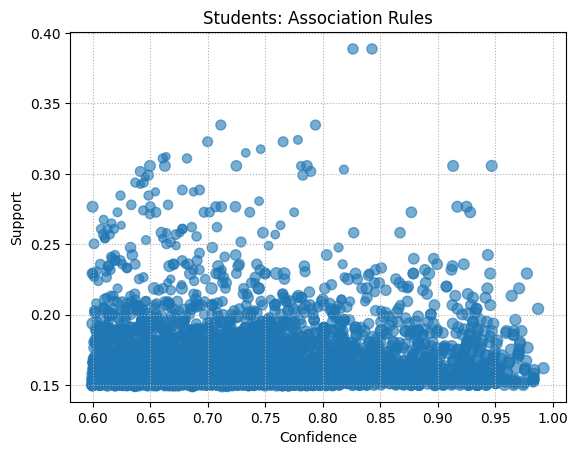


Non-Student Users - Top 5 Rules by Lift:
                                                                                   antecedents                                                                             consequents  support  confidence     lift
                                                   (Indiana Jones and the Last Crusade (1989)) (Raiders of the Lost Ark (1981), Star Wars: Episode V - The Empire Strikes Back (1980)) 0.157984    0.765840 2.906449
                                                   (Indiana Jones and the Last Crusade (1989))             (Raiders of the Lost Ark (1981), Star Wars: Episode IV - A New Hope (1977)) 0.154385    0.748393 2.743588
                                                                               (Aliens (1986))                                                                          (Alien (1979)) 0.170866    0.733930 2.703710
                                                                                (Alien (1979))            

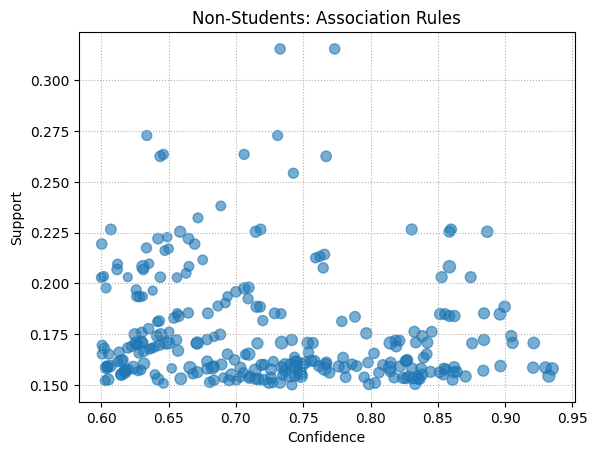

In [60]:
# Mine rules for Occupation-based segments
print("="*80)
print("OCCUPATION-BASED ANALYSIS (Students vs Non-Students)")
print("="*80)

student_freq, student_rules = mine_demographic_rules(student_pos_trans, "Students", min_sup=0.15, min_conf=0.6)
non_student_freq, non_student_rules = mine_demographic_rules(non_student_pos_trans, "Non-Students", min_sup=0.15, min_conf=0.6)

if student_rules is not None:
    print(f"\nStudent Users - Top 5 Rules by Lift:")
    print(student_rules.nlargest(5, 'lift')[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_string(index=False))
    plot_rules_scatter(student_rules, "Students: Association Rules")

if non_student_rules is not None:
    print(f"\nNon-Student Users - Top 5 Rules by Lift:")
    print(non_student_rules.nlargest(5, 'lift')[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_string(index=False))
    plot_rules_scatter(non_student_rules, "Non-Students: Association Rules")

In [61]:
# to compare top movies across demographics
def get_top_movies(freq_itemsets, top_n=10):
    """Get top N most frequent individual movies"""
    if freq_itemsets is None or freq_itemsets.empty:
        return []
    single_items = freq_itemsets[freq_itemsets['itemsets'].apply(lambda x: len(x) == 1)]
    top_items = single_items.nlargest(top_n, 'support')
    return [(movie_name_dict[list(item)[0]], sup) for item, sup in 
            zip(top_items['itemsets'], top_items['support'])]

print("="*80)
print("COMPARATIVE ANALYSIS")
print("="*80)

print("\nTop 10 Movies - Male Users:")
for i, (movie, sup) in enumerate(get_top_movies(male_freq, 10), 1):
    print(f"{i}. {movie} (support={sup:.3f})")

print("\nTop 10 Movies - Female Users:")
for i, (movie, sup) in enumerate(get_top_movies(female_freq, 10), 1):
    print(f"{i}. {movie} (support={sup:.3f})")

print("\nTop 10 Movies - Students:")
for i, (movie, sup) in enumerate(get_top_movies(student_freq, 10), 1):
    print(f"{i}. {movie} (support={sup:.3f})")

print("\nTop 10 Movies - Non-Students:")
for i, (movie, sup) in enumerate(get_top_movies(non_student_freq, 10), 1):
    print(f"{i}. {movie} (support={sup:.3f})")

COMPARATIVE ANALYSIS

Top 10 Movies - Male Users:
1. American Beauty (1999) (support=0.485)
2. Star Wars: Episode IV - A New Hope (1977) (support=0.483)
3. Star Wars: Episode V - The Empire Strikes Back (1980) (support=0.464)
4. Saving Private Ryan (1998) (support=0.420)
5. Matrix, The (1999) (support=0.409)
6. Raiders of the Lost Ark (1981) (support=0.408)
7. Terminator 2: Judgment Day (1991) (support=0.401)
8. Star Wars: Episode VI - Return of the Jedi (1983) (support=0.389)
9. Silence of the Lambs, The (1991) (support=0.383)
10. Godfather, The (1972) (support=0.367)

Top 10 Movies - Female Users:
1. American Beauty (1999) (support=0.442)
2. Shakespeare in Love (1998) (support=0.376)
3. Sixth Sense, The (1999) (support=0.349)
4. Silence of the Lambs, The (1991) (support=0.347)
5. Shawshank Redemption, The (1994) (support=0.331)
6. Schindler's List (1993) (support=0.327)
7. Fargo (1996) (support=0.315)
8. Star Wars: Episode IV - A New Hope (1977) (support=0.310)
9. Princess Bride, The

In [62]:
# insights summary for stakeholders
print("="*80)
print("KEY INSIGHTS FOR STAKEHOLDERS")
print("="*80)

# Gender insights
if male_rules is not None and female_rules is not None:
    male_top = set(str(list(r)[0]) for r in male_rules.nlargest(5, 'lift')['antecedents'])
    female_top = set(str(list(r)[0]) for r in female_rules.nlargest(5, 'lift')['antecedents'])
    
    print("\n  GENDER PREFERENCES:")
    print(f"   • Male users show {len(male_rules)} strong movie associations")
    print(f"   • Female users show {len(female_rules)} strong movie associations")
    if len(male_rules) > len(female_rules):
        print(f"   • Male users have {((len(male_rules)/len(female_rules))-1)*100:.1f}% more rule patterns")
    else:
        print(f"   • Female users have {((len(female_rules)/len(male_rules))-1)*100:.1f}% more rule patterns")

# Student insights
if student_rules is not None and non_student_rules is not None:
    print("\n  STUDENT vs NON-STUDENT PREFERENCES:")
    print(f"   • Students show {len(student_rules)} strong movie associations")
    print(f"   • Non-students show {len(non_student_rules)} strong movie associations")
    print(f"   • Student database contains {len(student_pos_trans)} users")
    print(f"   • Non-student database contains {len(non_student_pos_trans)} users")

print("\n MARKETING RECOMMENDATIONS:")
print("   • Target demographics show distinct viewing patterns")
print("   • Cross-selling opportunities exist within demographic segments")
print("   • Personalized recommendations should consider user demographics")

KEY INSIGHTS FOR STAKEHOLDERS

  GENDER PREFERENCES:
   • Male users show 1433 strong movie associations
   • Female users show 20 strong movie associations
   • Male users have 7065.0% more rule patterns

  STUDENT vs NON-STUDENT PREFERENCES:
   • Students show 3646 strong movie associations
   • Non-students show 270 strong movie associations
   • Student database contains 759 users
   • Non-student database contains 5281 users

 MARKETING RECOMMENDATIONS:
   • Target demographics show distinct viewing patterns
   • Cross-selling opportunities exist within demographic segments
   • Personalized recommendations should consider user demographics
